In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 

In [3]:
dirPath = "./sample"
files = os.listdir(dirPath)

#이미지 읽기
img = cv2.imread('./sample/hw11_sample.png', 0)

#height : 353, width : 438
print("height : ",img.shape[0])
print("width : ",img.shape[1])

height :  353
width :  438


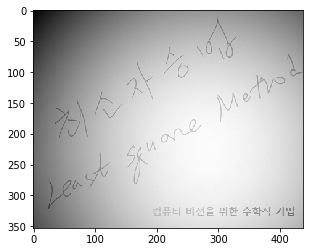

In [4]:
# 원본 이미지 확인 (이미지 왼쪽 위가 원점)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

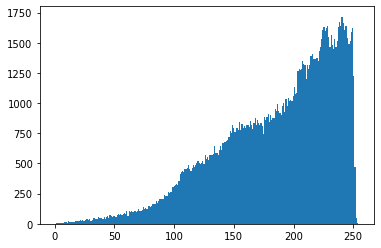

In [5]:
# 어떤 임계값을 사용하더라도 이미지를 쉽게 구분할 수 없다.
plt.hist(img.ravel(),256)
plt.show()

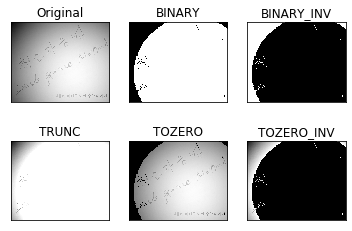

In [13]:
# global Thresholding(하나의 이미지에 전역으로 적용될 하나의 문턱값 할당)
ret, thresh1 = cv2.threshold(img,125,255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img,125,255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img,125,255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img,125,255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img,125,255, cv2.THRESH_TOZERO_INV)

titles =['Original','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

In [6]:
# (x,y)좌표  353x438(height X width) 
# Ax = b
# A
A = []
b = []

# height
for y in range(img.shape[0]):
    # width
    for x in range(img.shape[1]):
        a = [x*x, y*y, x*y, x, y, 1]
        I_x_y = img[y][x]
        A.append(a)
        b.append(I_x_y)  

In [7]:
# x = A_pinv b
A_pinv = np.linalg.pinv(A)
x = np.matmul(A_pinv, b)
x

array([-1.86253469e-03, -1.98346367e-03,  4.80578306e-05,  1.04053088e+00,
        8.86979711e-01,  2.01190915e+00])

In [8]:
a, b, c, d, e, f = x

In [9]:
# background - (원본 이미지를 곡면으로 근사)
I_img_b = np.zeros(img.shape)
# height
for y in range(img.shape[0]):   
    # width
    for x in range(img.shape[1]):   
        I_img_b[y][x] = a*x*x + b*y*y + c*x*y + d*x + e*y +f  

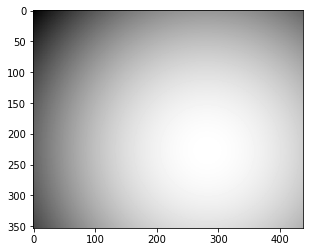

In [10]:
# background 확인
plt.imshow(I_img_b,cmap=plt.get_cmap('gray'))

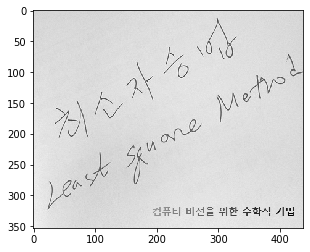

In [53]:
# background 와 원본을 빼줌.
img_n=img-I_img_b
# Original - background 사진
plt.imshow(img_n,cmap=plt.get_cmap('gray'))

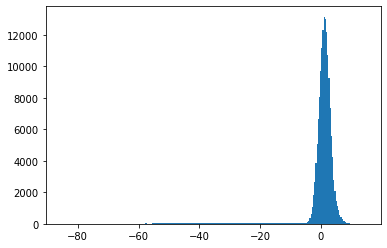

In [101]:
plt.hist(img_n.ravel(),256)
# plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
img_n

array([[-2.01190915, -2.0505775 , -2.08552077, ...,  1.7952847 ,
         0.37702154, -0.03751656],
       [-1.8969054 , -1.9356218 , -1.97061314, ..., -0.1106167 ,
         0.47107207, -0.94351408],
       [-2.77793472, -2.81669918, -2.85173857, ..., -0.01255118,
        -0.43091046,  0.15445533],
       ...,
       [ 9.51949232,  7.46400374,  8.41224022, ...,  2.00988146,
         3.57479806,  3.14343972],
       [ 9.02292065,  6.967384  ,  7.91557243, ...,  1.49240463,
         1.05727317,  1.62586678],
       [ 8.5303159 ,  6.4747312 ,  8.42287156, ...,  1.97889473,
         1.54371521,  5.11226076]])

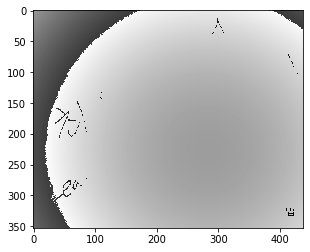

In [113]:
img_1 = thresh1-I_img_b
plt.imshow(img_1,cmap=plt.get_cmap('gray'))

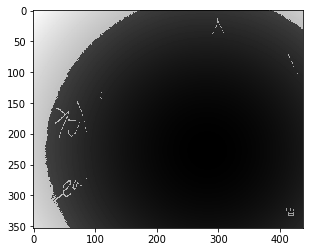

In [114]:
img_2 = thresh2-I_img_b
plt.imshow(img_2,cmap=plt.get_cmap('gray'))

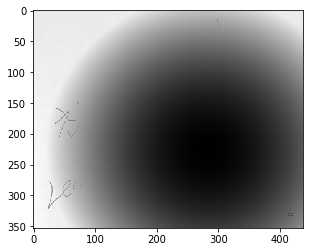

In [115]:
img_3 = thresh3-I_img_b
plt.imshow(img_3,cmap=plt.get_cmap('gray'))

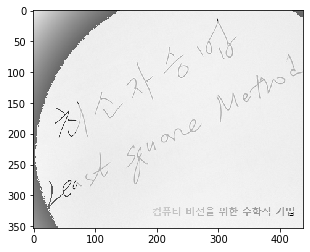

In [124]:
img_4 = thresh4-I_img_b
plt.imshow(img_4,cmap=plt.get_cmap('gray'))

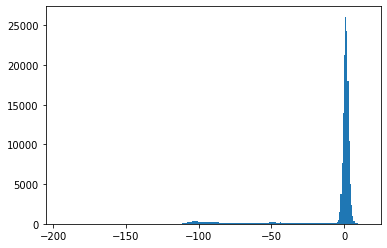

In [126]:
plt.hist(img_4.ravel(),256)
# plt.xticks([]), plt.yticks([])
plt.show()

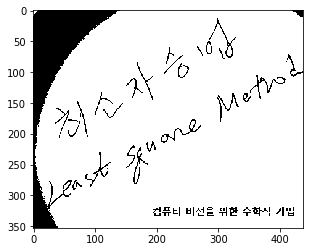

In [128]:
# global thresholding
ret2, th2 = cv2.threshold(img_4, -10, 255, cv2.THRESH_BINARY)

plt.imshow(th2,cmap=plt.get_cmap('gray'))

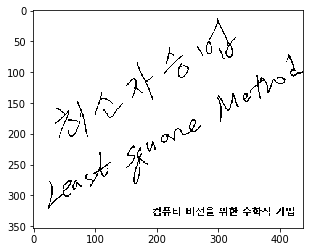

In [117]:
# global thresholding
ret1, th1 = cv2.threshold(img_n, -10, 255, cv2.THRESH_BINARY)

plt.imshow(th1,cmap=plt.get_cmap('gray'))